# User Story 3
- User utilizes the CurrentExp class to initialize a whole experiment as an object
- User fills out the Blueprint with the PARAMETERS and deliver it to the class.
- Users algorithm choice is MR-Hydra. 
- The algorithm is applied on the datasets Beef.
- Lastly, the run_single_pipeline() function is executed to run the a whole experiment as a one liner

In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import pandas as pd
import warnings
import time
from tsml_eval.publications.y2023.tsc_bakeoff.run_experiments import _set_bakeoff_classifier

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
from src.utils import setup_logger
logger = setup_logger("Basic_Func_Logger")
logger.info("Custom-named logger active.")


#own module imports
from src.classifierWrapper import BakeoffClassifier
from src.basic_func import dataset_provider,dataset_overview, overview_of_bakeoff_cl
from src.apply_dca import apply_label_errors, percentage_to_instance_converter
from src.utils import load_and_expand_yaml, get_frames_and_names
from src.visualizations import visualize_acc_decr, visualize_trace_M, visualize_acc_decr_multiple
from src.current_experiment import Experiment
from src.le_func import create_label_flip_trajectory, reconstruct_state_y_train, check_for_le_trajectory

[2025-08-26 13:47:21] INFO - Custom-named logger active.
[2025-08-26 13:47:21] INFO - Custom-named logger active.
[2025-08-26 13:47:21] INFO - apply_dca.py logger active


In [22]:
h = overview_of_bakeoff_cl(show_all_possible_names=True)

{'distance_based': ['1NN-DTW', 'GRAIL'], 'feature_based': ['Catch22', 'FreshPRINCE', 'TSFresh', 'Signatures'], 'shapelet_based': ['STC', 'RDST', 'RSF', 'MrSQM'], 'interval_based': ['R-STSF', 'RISE', 'TSF', 'CIF', 'STSF', 'DrCIF', 'QUANT'], 'dictionary_based': ['BOSS', 'cBOSS', 'TDE', 'WEASEL', 'WEASEL_V2'], 'convolution_based': ['ROCKET', 'MiniROCKET', 'MultiROCKET', 'Arsenal', 'Hydra', 'MR-Hydra'], 'deep_learning': ['CNN', 'ResNet', 'InceptionTime', 'H-InceptionTime', 'LITETime'], 'hybrid': ['HC1', 'HC2', 'RIST']}
classifier names can be written in several different naming conventions.
Here is a list of possible alternative names for the accesible bakeoff classifiers
['KNeighborsTimeSeriesClassifier', 'dtw', '1nn-dtw']
['GRAILClassifier', 'grail']
['Catch22Classifier', 'catch22']
['FreshPRINCEClassifier', 'freshprince']
['TSFreshClassifier', 'tsfresh']
['SignatureClassifier', 'signatures']
['ShapeletTransformClassifier', 'stc', 'stc-2hour']
['RDSTClassifier', 'rdst']
['RandomShapeletF

In [20]:
for name_ in ["1NN-DTW", "GRAIL", "Catch22", "FreshPRINCE", "TSFresh","STC", "RDST", "R-STSF", "TSF", "BOSS", "ROCKET", "CNN", "LITETime", "HC1"]:
    cl_ = BakeoffClassifier(name=name_)

[2025-08-12 16:34:17] INFO - Initializing BakeoffClassifier with name: 1NN-DTW, random_state: 0
[2025-08-12 16:34:17] INFO - Using 6 jobs for classifier training and prediction
[2025-08-12 16:34:17] INFO - Initializing BakeoffClassifier with name: GRAIL, random_state: 0
[2025-08-12 16:34:17] INFO - Using 6 jobs for classifier training and prediction
[2025-08-12 16:34:17] INFO - Initializing BakeoffClassifier with name: Catch22, random_state: 0
[2025-08-12 16:34:17] INFO - Using 6 jobs for classifier training and prediction
[2025-08-12 16:34:17] INFO - Initializing BakeoffClassifier with name: FreshPRINCE, random_state: 0
[2025-08-12 16:34:17] INFO - Using 6 jobs for classifier training and prediction
[2025-08-12 16:34:17] INFO - Initializing BakeoffClassifier with name: TSFresh, random_state: 0
[2025-08-12 16:34:17] INFO - Using 6 jobs for classifier training and prediction
[2025-08-12 16:34:17] INFO - Initializing BakeoffClassifier with name: STC, random_state: 0
[2025-08-12 16:34:17]

In [ ]:
##HELPERS
train_test_dict, meta_ = dataset_provider("FaceAll", reduction_factor=1)
train_arr = train_test_dict["y_train_small"]
ds_name_ = "FaceAll"
label_names = np.unique(train_arr)
p_vector_temp = [np.round(1/label_names.size, 4) for label in label_names]
LE_TRAJECTORY_DIR = "simulation_results/label_errors/" 
full_path = os.path.join(LE_TRAJECTORY_DIR, ds_name_,"leV1")

[2025-08-12 13:53:28] INFO - X_train             : (30, 1, 470)
[2025-08-12 13:53:28] INFO - y_train             : (30,)
[2025-08-12 13:53:28] INFO - X_test              : (30, 1, 470)
[2025-08-12 13:53:28] INFO - y_test              : (30,)
[2025-08-12 13:53:28] INFO - X_train_small       : (30, 1, 470)
[2025-08-12 13:53:28] INFO - y_train_small       : (30,)
[2025-08-12 13:53:28] INFO - X_test_small        : (30, 1, 470)
[2025-08-12 13:53:28] INFO - y_test_small        : (30,)


In [13]:
le_traj_001 = check_for_le_trajectory(le_trajectory_dir=full_path,
                                      leV="leV1", dataset=ds_name_,
                                      train_arr=train_arr,
                                      p_vector=p_vector_temp,
                                      random_seed=0)

[2025-08-12 13:53:29] INFO - Loading existing trajectory from simulation_results/label_errors/Beef/leV1/Beef_le_traj.parquet


In [14]:
le_traj_001

,instances,where,from,to
0,1,16,3,2
1,2,19,4,5
2,3,23,4,3
3,4,6,2,1
4,5,7,2,3
5,6,9,2,3
6,7,8,2,1
7,8,24,5,3
8,9,26,5,1
9,10,15,3,5


In [2]:
# Example usage
import copy
configuration = load_and_expand_yaml("experiments/experiment_Car15.yaml")
configuration = [copy.deepcopy(cfg) for cfg in configuration]  # Important if Configs are mutated!
configuration_2 = load_and_expand_yaml("experiments/experiment_2.yaml")
configuration_3 = load_and_expand_yaml("experiments/experiment_3.yaml")

# load an explicit config and initialize the experiment
experiment = Experiment(config=configuration[0], base_path="112UCRFolds", results_root="simulation_results")

[2025-08-26 13:47:27] INFO - Loading and expanding YAML configuration from: experiments/experiment_Car15.yaml
[2025-08-26 13:47:27] INFO - YAML configuration expanded into 1 configurations
[2025-08-26 13:47:27] INFO - Loading and expanding YAML configuration from: experiments/experiment_2.yaml
[2025-08-26 13:47:27] INFO - YAML configuration expanded into 30 configurations
[2025-08-26 13:47:27] INFO - Loading and expanding YAML configuration from: experiments/experiment_3.yaml
[2025-08-26 13:47:27] INFO - YAML configuration expanded into 93 configurations
[2025-08-26 13:47:27] INFO - X_train             : (60, 1, 577)
[2025-08-26 13:47:27] INFO - y_train             : (60,)
[2025-08-26 13:47:27] INFO - X_test              : (60, 1, 577)
[2025-08-26 13:47:27] INFO - y_test              : (60,)
[2025-08-26 13:47:27] INFO - X_train_small       : (60, 1, 577)
[2025-08-26 13:47:27] INFO - y_train_small       : (60,)
[2025-08-26 13:47:27] INFO - X_test_small        : (60, 1, 577)
[2025-08-26 

In [21]:
experiment.doe_params["step"]= 20
experiment.doe_params["stop"]=100

# You cant extend an experiment if the extension is smaller than one step.
# if historic stop == 75 and new stop == 80, then step must be <= 5

In [3]:
experiment.run_experiment()

[2025-08-26 13:47:30] INFO - Run Experiment
[2025-08-26 13:47:30] INFO - Converting percentage-based DOE parameters to instance-based parameters
[2025-08-26 13:47:30] INFO - requested_instance_step = 6.0 will be transformed into 6
[2025-08-26 13:47:30] INFO - requested_percentage_step = 10 % || transformed into 10.0 %
[2025-08-26 13:47:30] INFO - Converting percentage-based DOE parameters to instance-based parameters
[2025-08-26 13:47:30] INFO - stop value is 100% --> set to number of instances
[2025-08-26 13:47:30] WARNING - Could not assign GPU: NVML Shared Library Not Found
[2025-08-26 13:47:30] INFO - label_names: ['1' '2' '3' '4']
[2025-08-26 13:47:30] INFO - Current Label Error Strategy: DEFAULT: leV1
[2025-08-26 13:47:30] INFO - The p_vector for the current_experiment: [0.25, 0.25, 0.25, 0.25]
[2025-08-26 13:47:30] INFO - Searching inside simulation_results/MINI-ROCKET/Car for results
[2025-08-26 13:47:30] INFO - Looking for files matching pattern: leV1_0_(\d+)_(\d+)_(\d+) with 

Cap reached
results are not present with the current experiment parameters
There is [1] no matching labelerror Version and [2] no matching randomSeed or [3] no experiment at all


[2025-08-26 13:47:30] INFO - ------------------------Train time=0.36s, Eval Time=0.21s
[2025-08-26 13:47:30] INFO - Algorithm                         Accuracy
[2025-08-26 13:47:30] INFO - MINI-ROCKET                       0.9167
[2025-08-26 13:47:30] INFO - current iteration: 0 at step_val 1 for current LE_instances: 0 error_relative: 0
[2025-08-26 13:47:30] INFO - Iteration finished succesfully 

[2025-08-26 13:47:30] INFO - changed label 3 to 2 at index 32 of the data
[2025-08-26 13:47:30] INFO - changed label 3 to 2 at index 12 of the data
[2025-08-26 13:47:30] INFO - changed label 3 to 1 at index 58 of the data
[2025-08-26 13:47:30] INFO - changed label 4 to 1 at index 44 of the data
[2025-08-26 13:47:30] INFO - changed label 2 to 4 at index 14 of the data
[2025-08-26 13:47:30] INFO - changed label 3 to 1 at index 35 of the data
[2025-08-26 13:47:30] INFO - current class balance distribution: {'1': 19, '2': 17, '3': 7, '4': 17}
[2025-08-26 13:47:30] INFO - Building Classifier: Bake

In [23]:
experiment.df_

,step,LE_instances,LE_relative,accuracy,train_time,eval_time,y_train_history,y_pred,y_pred_prob
0,0,0,0.000000,0.807692,2.7865,7.9933,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,7,11,0.019643,0.818343,2.8862,8.0702,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,8,22,0.039286,0.842604,2.7106,7.9354,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,1,28,0.050000,0.849112,2.7930,7.9756,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,9,33,0.058929,0.876923,2.7086,7.8552,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
5,10,44,0.078571,0.873964,2.6703,7.8887,"[1, 1, 1, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
6,11,55,0.098214,0.820710,2.6913,8.0803,"[1, 1, 1, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
7,2,56,0.100000,0.820710,2.6664,7.9578,"[1, 1, 1, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
8,12,66,0.117857,0.804734,2.8575,7.9526,"[1, 1, 1, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
9,13,77,0.137500,0.795266,2.6752,7.9141,"[1, 1, 1, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [6]:
from src.apply_dca import load_trace_m

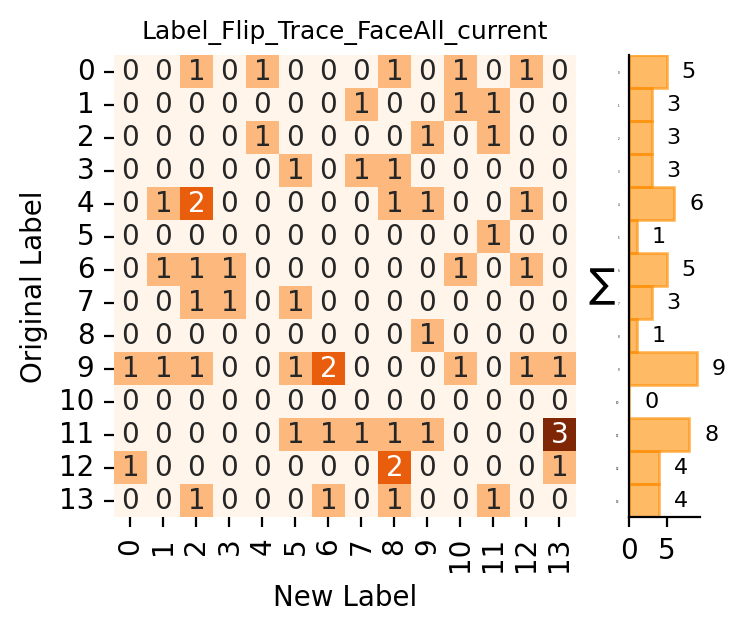

In [18]:
trace_Matric = load_trace_m(df_temp=experiment.df_.iloc[17:23])
visualize_trace_M(trace_M= trace_Matric, cl_= "current", ds_="FaceAll", figsize=(5.5, 3))

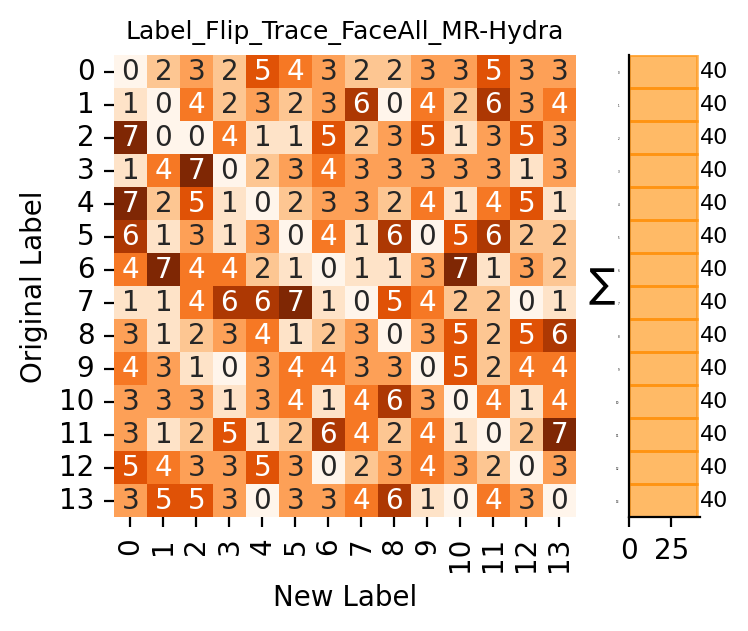

In [24]:
experiment.trace_M()

In [9]:
experiment_ = Experiment(config = configuration_3[48], base_path="112UCRFolds", results_root="simulation_results")
experiment_.doe_params["step"]= 7

[2025-08-12 13:50:34] INFO - X_train             : (30, 1, 470)
[2025-08-12 13:50:34] INFO - y_train             : (30,)
[2025-08-12 13:50:34] INFO - X_test              : (30, 1, 470)
[2025-08-12 13:50:34] INFO - y_test              : (30,)
[2025-08-12 13:50:34] INFO - X_train_small       : (30, 1, 470)
[2025-08-12 13:50:34] INFO - y_train_small       : (30,)
[2025-08-12 13:50:34] INFO - X_test_small        : (30, 1, 470)
[2025-08-12 13:50:34] INFO - y_test_small        : (30,)
[2025-08-12 13:50:34] INFO - Initializing BakeoffClassifier with name: MR-Hydra, random_state: 0
[2025-08-12 13:50:34] INFO - Using 6 jobs for classifier training and prediction
[2025-08-12 13:50:34] INFO - Initializing Exp with dataset: Beef, classifier: MR-Hydra, strategy: LabelErrors
[2025-08-12 13:50:34] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 100, 'step': 5}


In [11]:
experiment_.df_

,step,LE_instances,LE_relative,accuracy,train_time,eval_time,y_train_history,y_pred,y_pred_prob
0,1,0,0.000000,0.766667,0.5217,1.0436,"[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, ...","[4, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
1,12,2,0.066667,0.700000,0.5142,0.9608,"[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, ...","[4, 1, 1, 1, 1, 1, 2, 5, 2, 1, 2, 2, 2, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
2,7,3,0.100000,0.700000,0.5986,0.9819,"[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, ...","[4, 1, 1, 1, 1, 1, 2, 5, 2, 1, 2, 2, 2, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
3,13,4,0.133333,0.633333,0.6903,0.9608,"[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, ...","[4, 1, 1, 1, 1, 1, 1, 5, 5, 1, 2, 2, 1, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
4,2,6,0.200000,0.633333,0.6883,0.9966,"[1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 2, 2, 3, 3, 3, ...","[4, 1, 1, 1, 1, 1, 1, 5, 3, 1, 2, 2, 2, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
5,14,8,0.266667,0.633333,0.6789,1.0107,"[1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3, 3, 3, ...","[4, 1, 1, 1, 1, 1, 1, 5, 3, 1, 2, 2, 1, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
6,8,9,0.300000,0.566667,0.6669,0.9877,"[1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3, 3, 3, ...","[4, 1, 1, 1, 1, 1, 1, 5, 3, 1, 2, 2, 1, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
7,15,10,0.333333,0.566667,0.7080,1.0241,"[1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3, 3, 3, ...","[4, 1, 1, 1, 1, 1, 1, 5, 3, 1, 2, 2, 1, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [1.0, 0.0, 0.0, 0...."
8,3,12,0.400000,0.500000,0.6406,1.0055,"[5, 2, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3, 3, 3, ...","[4, 2, 1, 1, 2, 1, 1, 5, 3, 5, 2, 2, 1, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [0.0, 1.0, 0.0, 0...."
9,16,14,0.466667,0.433333,0.6678,1.0598,"[5, 2, 1, 1, 1, 1, 1, 3, 1, 3, 5, 2, 3, 3, 1, ...","[4, 2, 1, 1, 2, 1, 1, 5, 1, 5, 5, 2, 1, 3, 1, ...","[[0.0, 0.0, 0.0, 1.0, 0.0], [0.0, 1.0, 0.0, 0...."


In [10]:
experiment_.run_experiment()

[2025-08-12 13:50:35] INFO - Run Experiment
[2025-08-12 13:50:35] INFO - Converting percentage-based DOE parameters to instance-based parameters
[2025-08-12 13:50:35] INFO - requested_instance_step = 2.1 will be transformed into 2
[2025-08-12 13:50:35] INFO - requested_percentage_step = 7 % || transformed into 6.6667 %
[2025-08-12 13:50:35] INFO - requested_number_of_percentage_steps = 14 was increased by one
[2025-08-12 13:50:35] INFO - Converting percentage-based DOE parameters to instance-based parameters
[2025-08-12 13:50:35] INFO - stop value is 100% --> set to number of instances
[2025-08-12 13:50:35] WARNING - Could not assign GPU: NVML Shared Library Not Found
[2025-08-12 13:50:35] INFO - label_names: ['1' '2' '3' '4' '5']
[2025-08-12 13:50:35] INFO - Current Label Error Strategy: DEFAULT: leV1
[2025-08-12 13:50:35] INFO - The p_vector for the current_experiment: [0.2, 0.2, 0.2, 0.2, 0.2]
[2025-08-12 13:50:35] INFO - Searching inside simulation_results/MR-Hydra/Beef for results

Cap reached
All historic Steps are to coarse. Historic steps: [3, 6]
Cannot load any file which meets the requested stepsize of:2 


[2025-08-12 13:50:37] INFO - ------------------------Train time=0.51s, Eval Time=0.96s
[2025-08-12 13:50:37] INFO - Algorithm                         Accuracy
[2025-08-12 13:50:37] INFO - MR-Hydra                          0.7000
[2025-08-12 13:50:37] INFO - current iteration: 0 at step_val 12 for current LE_instances: 2 error_relative: 0.06666666666666667
[2025-08-12 13:50:37] INFO - Iteration finished succesfully 

[2025-08-12 13:50:37] INFO - y_train for step_: 4  will be calculated
[2025-08-12 13:50:37] INFO - Building Classifier: BakeoffClassifier with name: MR-Hydra
[2025-08-12 13:50:39] INFO - ------------------------Train time=0.69s, Eval Time=0.96s
[2025-08-12 13:50:39] INFO - Algorithm                         Accuracy
[2025-08-12 13:50:39] INFO - MR-Hydra                          0.6333
[2025-08-12 13:50:39] INFO - current iteration: 1 at step_val 13 for current LE_instances: 4 error_relative: 0.13333333333333333
[2025-08-12 13:50:39] INFO - Iteration finished succesfully 

[2

[2025-08-12 13:41:27] INFO - X_train             : (500, 1, 128)
[2025-08-12 13:41:27] INFO - y_train             : (500,)
[2025-08-12 13:41:27] INFO - X_test              : (625, 1, 128)
[2025-08-12 13:41:27] INFO - y_test              : (625,)
[2025-08-12 13:41:27] INFO - X_train_small       : (500, 1, 128)
[2025-08-12 13:41:27] INFO - y_train_small       : (500,)
[2025-08-12 13:41:27] INFO - X_test_small        : (625, 1, 128)
[2025-08-12 13:41:27] INFO - y_test_small        : (625,)
[2025-08-12 13:41:27] INFO - Initializing BakeoffClassifier with name: MR-Hydra, random_state: 0
[2025-08-12 13:41:27] INFO - Using 6 jobs for classifier training and prediction
[2025-08-12 13:41:27] INFO - Initializing Exp with dataset: SwedishLeaf, classifier: MR-Hydra, strategy: LabelErrors
[2025-08-12 13:41:27] INFO - and configuration with DCA-type: LabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 90, 'step': 5}


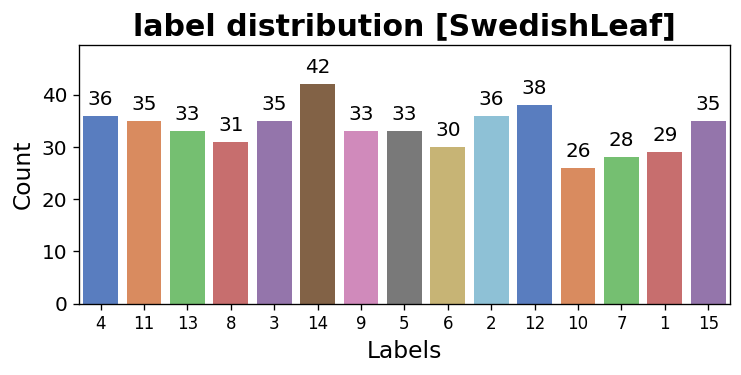

In [25]:
experiment_ = Experiment(config = configuration_2[0], base_path="112UCRFolds", results_root="simulation_results")
experiment_.dataset_overview()

In [5]:
experimental_dict = {}
my_config = configuration_2[0:6]

for i_, exp_conf in enumerate(my_config):
    current_exp = Experiment(config=exp_conf, base_path="112UCRFolds", results_root="simulation_results")
    exp_name = "experiment_"+str(i_)
    current_exp.run_experiment()
    experimental_dict[exp_name]=[exp_conf, current_exp]

[2025-06-12 12:45:25] INFO - Initializing BakeoffClassifier with name: MR-Hydra, random_state: 0
[2025-06-12 12:45:25] INFO - Initializing Exp with dataset: SwedishLeaf, classifier: MR-Hydra, strategy: LabelErrors
[2025-06-12 12:45:25] INFO - and configuration with DCA-typeLabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 90, 'step': 5}
[2025-06-12 12:45:25] INFO - Run Experiment
[2025-06-12 12:45:25] INFO - Converting percentage-based DOE parameters to instance-based parameters
[2025-06-12 12:45:25] INFO - requested_instance_step = 25.0 will be transformed into 25
[2025-06-12 12:45:25] INFO - requested_percentage_step = 5 % || transformed into 5.0 %
[2025-06-12 12:45:25] INFO - label_names: ['1' '10' '11' '12' '13' '14' '15' '2' '3' '4' '5' '6' '7' '8' '9']
[2025-06-12 12:45:25] INFO - Current Label Error Strategy: DEFAULT: leV1
[2025-06-12 12:45:25] INFO - The p_vector for the current_experiment: [0.0667, 0.0667, 0.0667, 0.0667, 0.

X_train             : (500, 1, 128)
y_train             : (500,)
X_test              : (625, 1, 128)
y_test              : (625,)
X_train_small       : (500, 1, 128)
y_train_small       : (500,)
X_test_small        : (625, 1, 128)
y_test_small        : (625,)
X_train             : (500, 1, 128)
y_train             : (500,)
X_test              : (625, 1, 128)
y_test              : (625,)
X_train_small       : (500, 1, 128)
y_train_small       : (500,)
X_test_small        : (625, 1, 128)
y_test_small        : (625,)
X_train             : (500, 1, 128)
y_train             : (500,)
X_test              : (625, 1, 128)
y_test              : (625,)
X_train_small       : (500, 1, 128)
y_train_small       : (500,)
X_test_small        : (625, 1, 128)
y_test_small        : (625,)
X_train             : (500, 1, 128)
y_train             : (500,)
X_test              : (625, 1, 128)
y_test              : (625,)
X_train_small       : (500, 1, 128)
y_train_small       : (500,)
X_test_small        : (62

[2025-06-12 12:45:25] INFO - Initializing BakeoffClassifier with name: Weasel-D, random_state: 0
[2025-06-12 12:45:25] INFO - Initializing Exp with dataset: SwedishLeaf, classifier: Weasel-D, strategy: LabelErrors
[2025-06-12 12:45:25] INFO - and configuration with DCA-typeLabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 1, 'start': 0, 'stop': 90, 'step': 5}
[2025-06-12 12:45:25] INFO - Run Experiment
[2025-06-12 12:45:25] INFO - Converting percentage-based DOE parameters to instance-based parameters
[2025-06-12 12:45:25] INFO - requested_instance_step = 25.0 will be transformed into 25
[2025-06-12 12:45:25] INFO - requested_percentage_step = 5 % || transformed into 5.0 %
[2025-06-12 12:45:25] INFO - label_names: ['1' '10' '11' '12' '13' '14' '15' '2' '3' '4' '5' '6' '7' '8' '9']
[2025-06-12 12:45:25] INFO - Current Label Error Strategy: DEFAULT: leV1
[2025-06-12 12:45:25] INFO - The p_vector for the current_experiment: [0.0667, 0.0667, 0.0667, 0.0667, 0.

X_train             : (500, 1, 128)
y_train             : (500,)
X_test              : (625, 1, 128)
y_test              : (625,)
X_train_small       : (500, 1, 128)
y_train_small       : (500,)
X_test_small        : (625, 1, 128)
y_test_small        : (625,)


In [6]:
experimental_dict.keys()

dict_keys(['experiment_0', 'experiment_1', 'experiment_2', 'experiment_3', 'experiment_4', 'experiment_5'])

In [7]:
experimental_dict["experiment_1"][0]

{'DATASET_NAME': 'SwedishLeaf',
 'CLASSIFIER_NAME': 'Quant',
 'REDUCTION_F': 1,
 'RANDOM_S': 0,
 'DCA': {'type': 'LabelErrors',
  'DoE_param': {'le_strategy': 'leV1',
   'p_vec': 'None',
   'random_seed': 0,
   'start': 0,
   'stop': 90,
   'step': 5}}}

In [8]:
experimental_dict["experiment_1"][1].df_.iloc[15:20]

,step,LE_instances,LE_relative,accuracy,y_train_history,y_pred,y_pred_prob
15,15,375,0.75,0.4672,"[2, 12, 3, 4, 5, 12, 9, 14, 8, 1, 8, 7, 12, 6,...","[2, 11, 12, 4, 14, 1, 12, 13, 13, 8, 13, 11, 1...","[[0.11, 0.005, 0.03, 0.085, 0.14, 0.02, 0.095,..."
16,16,400,0.80,0.3696,"[2, 12, 3, 3, 5, 12, 9, 14, 8, 1, 8, 7, 12, 6,...","[1, 11, 12, 4, 14, 8, 12, 13, 13, 8, 13, 9, 14...","[[0.165, 0.005, 0.03, 0.085, 0.095, 0.025, 0.1..."
17,17,425,0.85,0.2864,"[2, 12, 3, 3, 5, 12, 9, 14, 8, 1, 8, 7, 12, 6,...","[2, 13, 12, 4, 14, 5, 11, 13, 13, 8, 9, 4, 14,...","[[0.145, 0.02, 0.045, 0.04, 0.105, 0.01, 0.1, ..."
18,18,450,0.90,0.1856,"[2, 12, 3, 3, 5, 12, 9, 14, 2, 1, 8, 7, 12, 6,...","[2, 13, 12, 4, 14, 8, 12, 12, 13, 8, 13, 11, 5...","[[0.125, 0.005, 0.03, 0.03, 0.105, 0.055, 0.11..."


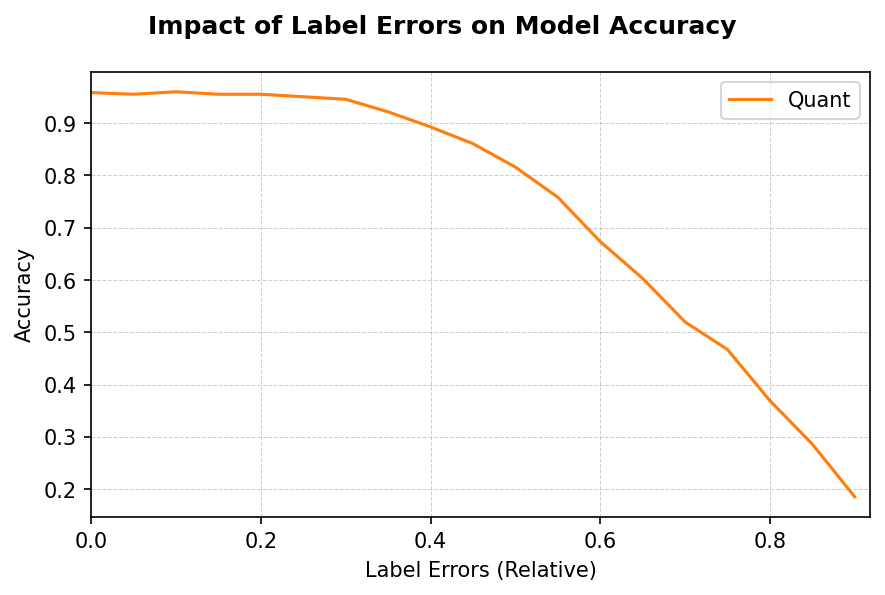

In [9]:
experimental_dict["experiment_1"][1].acc_decr()
#or use the function directly
#visualize_acc_decr(experimental_dict["experiment_1"][1].df_, first="relative", cl_="MR-Hydra")

In [10]:
dfs_, clfs_, clfs_seed_ = get_frames_and_names(exp_dict = experimental_dict)

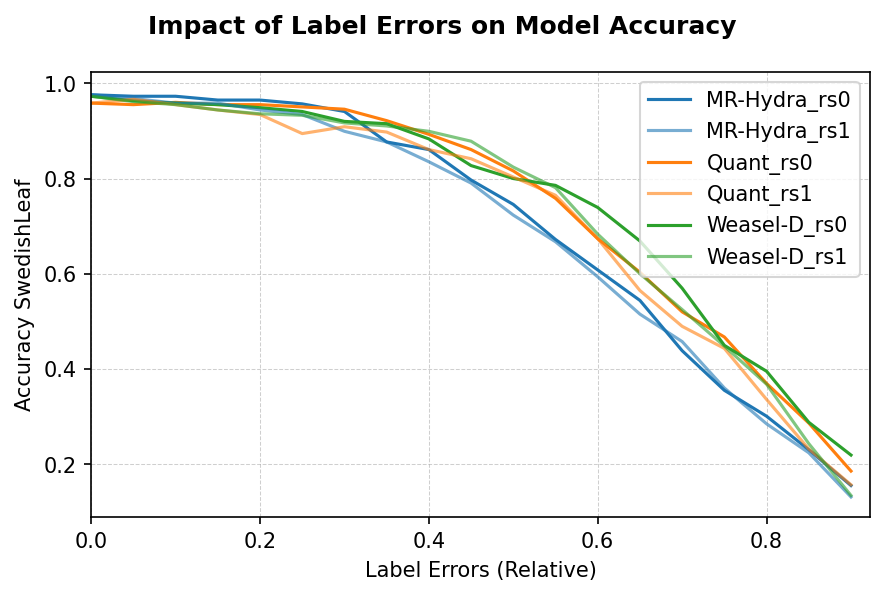

In [11]:
visualize_acc_decr_multiple(multiple_df=dfs_, vis_names_=clfs_seed_, ds_="SwedishLeaf", filename_="acc_decr", save_fig=True, exp_folder=None)

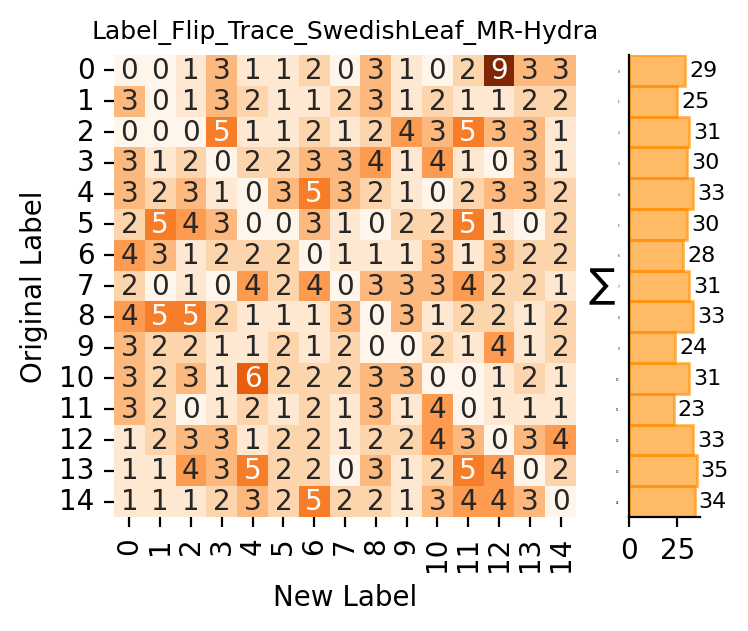

In [ ]:
experimental_dict["experiment_0"][1].trace_M()

In [4]:
my_config = configuration_3[6:8]
my_config

[{'DATASET_NAME': 'Car',
  'CLASSIFIER_NAME': 'MR-Hydra',
  'REDUCTION_F': 1,
  'RANDOM_S': 0,
  'DCA': {'type': 'LabelErrors',
   'DoE_param': {'le_strategy': 'leV1',
    'p_vec': 'None',
    'random_seed': 0,
    'start': 0,
    'stop': 90,
    'step': 2}}},
 {'DATASET_NAME': 'Car',
  'CLASSIFIER_NAME': 'Quant',
  'REDUCTION_F': 1,
  'RANDOM_S': 0,
  'DCA': {'type': 'LabelErrors',
   'DoE_param': {'le_strategy': 'leV1',
    'p_vec': 'None',
    'random_seed': 0,
    'start': 0,
    'stop': 90,
    'step': 2}}}]

In [6]:
experimental_dict = {}
my_config = configuration_3[6:9]

for i_, exp_conf in enumerate(my_config):
    current_exp = Experiment(config=exp_conf, base_path="112UCRFolds", results_root="simulation_results")
    exp_name = "experiment_"+str(i_)
    current_exp.run_experiment()
    experimental_dict[exp_name]=[exp_conf, current_exp]

[2025-07-03 14:01:44] INFO - X_train             : (60, 1, 577)
[2025-07-03 14:01:44] INFO - y_train             : (60,)
[2025-07-03 14:01:44] INFO - X_test              : (60, 1, 577)
[2025-07-03 14:01:44] INFO - y_test              : (60,)
[2025-07-03 14:01:44] INFO - X_train_small       : (60, 1, 577)
[2025-07-03 14:01:44] INFO - y_train_small       : (60,)
[2025-07-03 14:01:44] INFO - X_test_small        : (60, 1, 577)
[2025-07-03 14:01:44] INFO - y_test_small        : (60,)
[2025-07-03 14:01:44] INFO - Initializing BakeoffClassifier with name: MR-Hydra, random_state: 0
[2025-07-03 14:01:44] INFO - Initializing Exp with dataset: Car, classifier: MR-Hydra, strategy: LabelErrors
[2025-07-03 14:01:44] INFO - and configuration with DCA-typeLabelErrors, DoE_param: {'le_strategy': 'leV1', 'p_vec': 'None', 'random_seed': 0, 'start': 0, 'stop': 90, 'step': 2}
[2025-07-03 14:01:44] INFO - Run Experiment
[2025-07-03 14:01:44] INFO - Converting percentage-based DOE parameters to instance-base

HISTORY_DF
step                                                              45
LE_instances                                                      45
LE_relative                                                 0.750015
accuracy                                                    0.183333
y_train_history    [3, 2, 2, 2, 4, 1, 2, 1, 1, 2, 3, 2, 4, 3, 1, ...
y_pred             [1, 4, 2, 1, 1, 1, 2, 1, 1, 1, 3, 1, 3, 4, 1, ...
y_pred_prob        [[1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0], [...
Name: 45, dtype: object
y_train
['3' '2' '2' '2' '4' '1' '2' '1' '1' '2' '3' '2' '4' '3' '1' '2' '3' '1'
 '1' '1' '1' '4' '3' '4' '4' '1' '3' '2' '2' '2' '1' '2' '1' '3' '4' '3'
 '3' '3' '1' '1' '2' '3' '1' '4' '2' '3' '1' '2' '1' '1' '1' '1' '4' '4'
 '4' '4' '2' '3' '3' '2']
y_train_initial
['1' '4' '2' '1' '2' '4' '1' '4' '4' '4' '1' '2' '3' '1' '2' '2' '1' '1'
 '4' '2' '1' '4' '4' '1' '3' '3' '1' '4' '3' '4' '2' '2' '3' '4' '3' '3'
 '1' '3' '2' '2' '4' '1' '1' '2' '4' '2' '4' '1' '3' '2' '1' '4' '2

[2025-07-03 14:01:46] INFO - ------------------------Train time=0.85s, Eval Time=1.06s
[2025-07-03 14:01:46] INFO - 
Algorithm                         Accuracy
[2025-07-03 14:01:46] INFO - Weasel-D                          0.1833
[2025-07-03 14:01:46] INFO - current iteration: 46   current LE_step: 46 error_relative: 0.766682
[2025-07-03 14:01:46] INFO - changed label 4 to 2 at index 53 of the data
[2025-07-03 14:01:46] INFO - current class balance distribution: {'1': 18, '2': 18, '3': 14, '4': 10}
[2025-07-03 14:01:46] INFO - 

Classifier: BakeoffClassifier
[2025-07-03 14:01:48] INFO - ------------------------Train time=0.81s, Eval Time=0.97s
[2025-07-03 14:01:48] INFO - 
Algorithm                         Accuracy
[2025-07-03 14:01:48] INFO - Weasel-D                          0.1667
[2025-07-03 14:01:48] INFO - current iteration: 47   current LE_step: 47 error_relative: 0.783349
[2025-07-03 14:01:48] INFO - changed label 2 to 1 at index 56 of the data
[2025-07-03 14:01:48] INFO - curr

✅ Results saved in: simulation_results/Weasel-D/Car/leV1_0_0_54_1


In [30]:
experimental_dict["experiment_0"][1].df_

,step,LE_instances,LE_relative,accuracy,y_train_history,y_pred,y_pred_prob
0,0,0,0.000000,0.933333,"[1, 4, 2, 1, 2, 4, 1, 4, 4, 4, 1, 2, 3, 1, 2, ...","[4, 3, 2, 3, 4, 3, 4, 4, 2, 3, 1, 1, 1, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 1.0, 0.0], [..."
1,1,1,0.016667,0.916667,"[1, 4, 2, 1, 2, 4, 1, 4, 4, 4, 1, 2, 3, 1, 2, ...","[4, 3, 2, 3, 4, 3, 4, 4, 2, 3, 1, 1, 1, 4, 3, ...","[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 1.0, 0.0], [..."
2,2,2,0.033334,0.916667,"[1, 4, 2, 1, 2, 4, 1, 4, 4, 4, 1, 2, 3, 1, 2, ...","[4, 3, 2, 3, 4, 3, 4, 4, 2, 3, 1, 1, 1, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 1.0, 0.0], [..."
3,3,3,0.050001,0.916667,"[1, 4, 2, 1, 2, 4, 1, 4, 4, 4, 1, 2, 3, 1, 2, ...","[4, 3, 2, 3, 4, 3, 4, 4, 2, 3, 1, 1, 1, 3, 3, ...","[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 1.0, 0.0], [..."
4,4,4,0.066668,0.900000,"[1, 4, 2, 1, 2, 4, 1, 4, 4, 4, 1, 2, 3, 1, 2, ...","[4, 3, 2, 3, 4, 3, 4, 4, 2, 3, 1, 1, 1, 4, 3, ...","[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 1.0, 0.0], [..."
5,5,5,0.083335,0.916667,"[1, 4, 2, 1, 2, 4, 1, 4, 4, 4, 1, 2, 3, 1, 2, ...","[4, 3, 2, 3, 4, 3, 4, 4, 2, 3, 1, 1, 1, 4, 3, ...","[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 1.0, 0.0], [..."
6,6,6,0.100002,0.933333,"[1, 4, 2, 1, 2, 4, 1, 4, 4, 4, 1, 2, 3, 1, 2, ...","[4, 3, 2, 3, 4, 3, 4, 4, 2, 3, 1, 1, 1, 4, 4, ...","[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 1.0, 0.0], [..."
7,7,7,0.116669,0.933333,"[1, 4, 2, 1, 2, 4, 1, 4, 4, 4, 2, 2, 3, 1, 2, ...","[4, 3, 2, 3, 4, 3, 4, 4, 2, 3, 1, 1, 1, 4, 4, ...","[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 1.0, 0.0], [..."
8,8,8,0.133336,0.933333,"[1, 4, 2, 1, 2, 4, 1, 4, 4, 4, 2, 2, 3, 1, 2, ...","[4, 3, 2, 3, 4, 3, 4, 4, 2, 4, 1, 1, 1, 3, 4, ...","[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 1.0, 0.0], [..."
9,9,9,0.150003,0.850000,"[1, 4, 2, 1, 2, 4, 1, 4, 4, 4, 2, 2, 1, 1, 2, ...","[4, 3, 2, 3, 4, 4, 4, 4, 2, 4, 1, 1, 1, 1, 4, ...","[[0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 1.0, 0.0], [..."


In [3]:
from pipeline_builder import run_single_pipeline
DATASET_NAME = "Car"                   #should be in DS_list
CLASSIFIER_NAME = "MR-Hydra"            #should be in cl_ names
REDUCTION_F = 1                         #optional. only for large datasets
RANDOM_S = 0                            #Random Seed for everything except the DCA
DCA= "LabelErrors"                      #DCA Strategy Category --> Determines DoE_PARAM DICT
DoE_PARAM = {"random_seed":0,"start":0,"stop":90,"step":1}   #stop = max 90% of test_set_size, step=1-10 
EXP_FOLD = "simulation_results/"                            #respect folder structure
SAVE_FILES = True 
DATA_VIS  = False

experiment_args = [DATASET_NAME, CLASSIFIER_NAME, REDUCTION_F,RANDOM_S, DCA, DoE_PARAM, EXP_FOLD, SAVE_FILES]

results = run_single_pipeline(*experiment_args)

[2025-07-03 12:25:43] INFO - X_train             : (60, 1, 577)
[2025-07-03 12:25:43] INFO - y_train             : (60,)
[2025-07-03 12:25:43] INFO - X_test              : (60, 1, 577)
[2025-07-03 12:25:43] INFO - y_test              : (60,)
[2025-07-03 12:25:43] INFO - X_train_small       : (60, 1, 577)
[2025-07-03 12:25:43] INFO - y_train_small       : (60,)
[2025-07-03 12:25:43] INFO - X_test_small        : (60, 1, 577)
[2025-07-03 12:25:43] INFO - y_test_small        : (60,)
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


TypeError: apply_label_errors() got an unexpected keyword argument 'stop'